In [59]:
import json

resultsCNN = {}
resultsML = {}
resultsDL = {}


with open('resultsCNNAllcopy.json') as json_file:
    resultsCNN = json.load(json_file)



print(json.dumps(resultsCNN, indent=1))


{
 "Experiment": {
  "Raw": {
   "Fruits": {
    "Blueberries": {
     "Model": {
      "CNN": {
       "Epochs": {
        "100": {
         "r2": -0.004041072212986885
        },
        "300": {
         "r2": -0.28635505761112245
        }
       }
      },
      "DenseNet": {
       "Epochs": {
        "100": {
         "r2": -0.44493061337426054
        },
        "300": {
         "r2": -0.9744979839520378
        }
       }
      },
      "MobileNet": {
       "Epochs": {
        "100": {
         "r2": -0.5500927296410199
        },
        "300": {
         "r2": -2.0988388365925834
        }
       }
      }
     }
    },
    "Raspberries": {
     "Model": {
      "CNN": {
       "Epochs": {
        "100": {
         "r2": -0.007139206571461276
        },
        "300": {
         "r2": -0.004507288967530609
        }
       }
      },
      "DenseNet": {
       "Epochs": {
        "100": {
         "r2": -0.14746271950135226
        },
        "300": {
         "r2": -0.363

In [55]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import pandas as pd

data = resultsCNN
# Extract data

print(data["Experiment"])
blueberries = data["Blueberries"]["Experiments"]
raspberries = data["Raspberries"]["Experiments"]
strawberries = data["Strawberries"]["Experiments"]

# Create DataFrames
df_blueberries = pd.DataFrame(blueberries)
df_raspberries = pd.DataFrame(raspberries)
df_strawberries = pd.DataFrame(strawberries)

# Plot R2 values for each fruit type
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

df_blueberries.plot(x="Model", y="R2", kind="bar", ax=axs[0], legend=None, rot=0)
axs[0].set_title("Blueberries R2")
axs[0].set_ylabel("R2 Value")

df_raspberries.plot(x="Model", y="R2", kind="bar", ax=axs[1], legend=None, rot=0)
axs[1].set_title("Raspberries R2")
axs[1].set_ylabel("R2 Value")

df_strawberries.plot(x="Model", y="R2", kind="bar", ax=axs[2], legend=None, rot=0)
axs[2].set_title("Strawberries R2")
axs[2].set_ylabel("R2 Value")

plt.tight_layout()
plt.show()

{'Raw': {'Fruits': {'Blueberries': {'Model': {'CNN': {'Epochs': {'100': {'r2': -0.004041072212986885, 'loss': 0.425820529460907, 'mse': 0.425820529460907, 'mae': 0.4974079132080078, 'rmse': 0.6525492668151855}, '300': {'r2': -0.28635505761112245, 'loss': 0.3195154368877411, 'mse': 0.3195154368877411, 'mae': 0.44928333163261414, 'rmse': 0.5652569532394409}}}, 'DenseNet': {'Epochs': {'100': {'r2': -0.44493061337426054, 'loss': 1.0411388874053955, 'mse': 1.0411388874053955, 'mae': 0.8645024299621582, 'rmse': 1.020362138748169}, '300': {'r2': -0.9744979839520378, 'loss': 0.9882475137710571, 'mse': 0.9882475137710571, 'mae': 0.7977596521377563, 'rmse': 0.9941064119338989}}}, 'MobileNet': {'Epochs': {'100': {'r2': -0.5500927296410199, 'loss': 1.2789806127548218, 'mse': 1.2789806127548218, 'mae': 1.0103901624679565, 'rmse': 1.1309202909469604}, '300': {'r2': -2.0988388365925834, 'loss': 1.2886801958084106, 'mse': 1.2886801958084106, 'mae': 0.8523396253585815, 'rmse': 1.1352005004882812}}}}}, 

KeyError: 'Blueberries'

[['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.004041072212986885], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.28635505761112245], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.44493061337426054], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '300', 'r2', -0.9744979839520378], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '100', 'r2', -0.5500927296410199], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '300', 'r2', -2.0988388365925834], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.007139206571461276], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.004507288967530609], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.14746271950

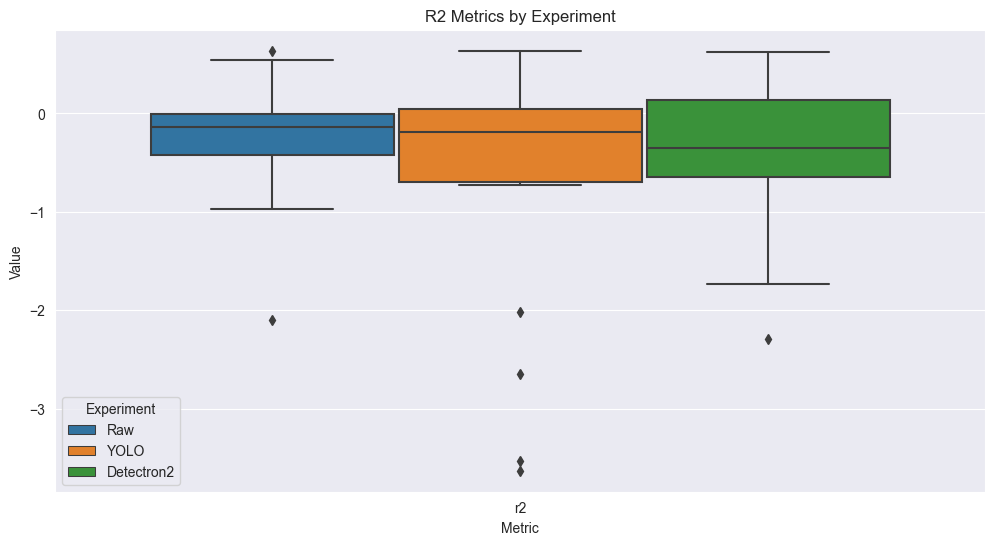

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
edgecolors=None
data = resultsCNN

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, dict):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["","Experiment", "","Fruit", "","Model", "","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Experiment", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Experiment")
plt.show()


[['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.004041072212986885], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.28635505761112245], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.44493061337426054], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '300', 'r2', -0.9744979839520378], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '100', 'r2', -0.5500927296410199], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '300', 'r2', -2.0988388365925834], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.007139206571461276], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.004507288967530609], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.14746271950

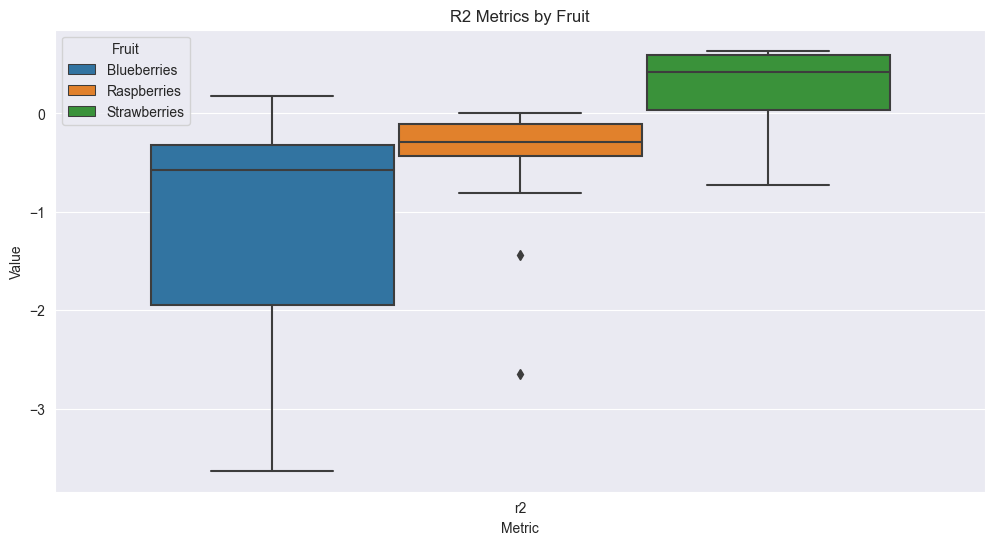

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = resultsCNN

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, dict):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["","Experiment", "","Fruit", "","Model", "","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Fruit", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Fruit")
plt.show()


[['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.004041072212986885], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.28635505761112245], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.44493061337426054], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '300', 'r2', -0.9744979839520378], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '100', 'r2', -0.5500927296410199], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '300', 'r2', -2.0988388365925834], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.007139206571461276], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.004507288967530609], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.14746271950

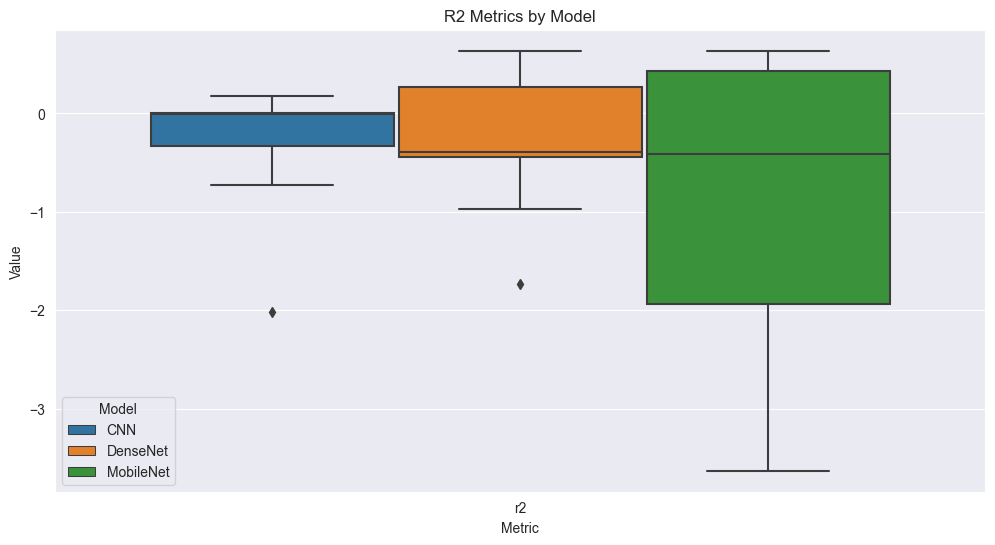

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = resultsCNN

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, dict):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["","Experiment", "","Fruit", "","Model", "","Epochs", "Metric", "Value"])


plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(x="Metric", y="Value", hue="Model", data=df[df["Metric"] == "r2"])
#swarmplot = sns.swarmplot(x="Model", y="Value", hue="Experiment", data=df, dodge=True, color=".25", ax=boxplot)


plt.title("R2 Metrics by Model")
plt.show()


[['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.004041072212986885], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.28635505761112245], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.44493061337426054], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '300', 'r2', -0.9744979839520378], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '100', 'r2', -0.5500927296410199], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '300', 'r2', -2.0988388365925834], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.007139206571461276], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.004507288967530609], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.14746271950

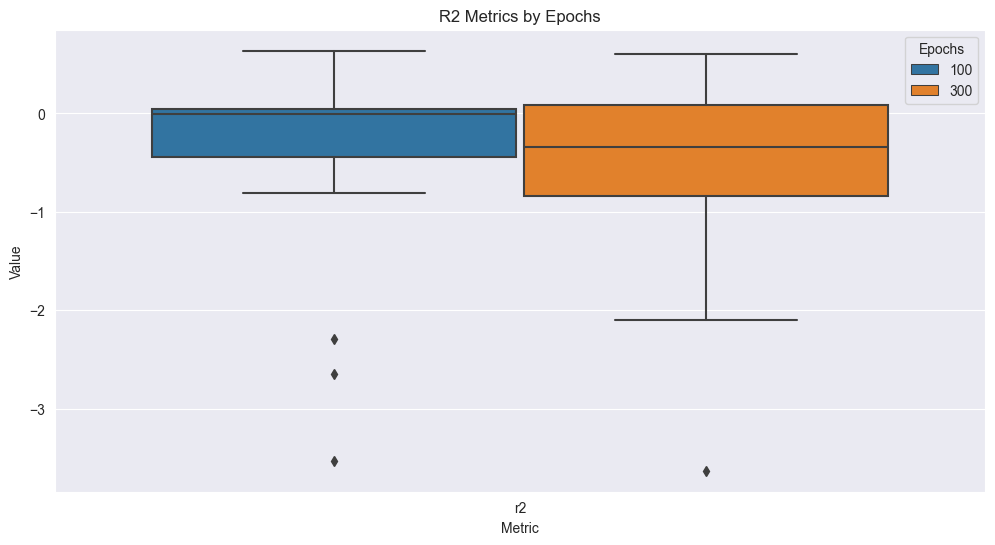

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = resultsCNN

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, dict):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["","Experiment", "","Fruit", "","Model", "","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Epochs", data=df[df["Metric"] == "r2"])

#sns.barplot(x="Metric", y="Value", hue="Model", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Epochs")
plt.show()


In [6]:
print(resultsCNN)

{'Raw': {'Images': {'CIBR': {'CNN': {'100': {'r2': -0.004041072212986885, 'loss': 0.425820529460907, 'mse': 0.425820529460907, 'mae': 0.4974079132080078, 'rmse': 0.6525492668151855}, '300': {'r2': -0.28635505761112245, 'loss': 0.3195154368877411, 'mse': 0.3195154368877411, 'mae': 0.44928333163261414, 'rmse': 0.5652569532394409}}, 'DenseNet': {'100': {'r2': -0.44493061337426054, 'loss': 1.0411388874053955, 'mse': 1.0411388874053955, 'mae': 0.8645024299621582, 'rmse': 1.020362138748169}, '300': {'r2': -0.9744979839520378, 'loss': 0.9882475137710571, 'mse': 0.9882475137710571, 'mae': 0.7977596521377563, 'rmse': 0.9941064119338989}}, 'MobileNet': {'100': {'r2': -0.5500927296410199, 'loss': 1.2789806127548218, 'mse': 1.2789806127548218, 'mae': 1.0103901624679565, 'rmse': 1.1309202909469604}, '300': {'r2': -2.0988388365925834, 'loss': 1.2886801958084106, 'mse': 1.2886801958084106, 'mae': 0.8523396253585815, 'rmse': 1.1352005004882812}}}, 'CIRR': {'CNN': {'100': {'r2': -0.007139206571461276, 